/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _e

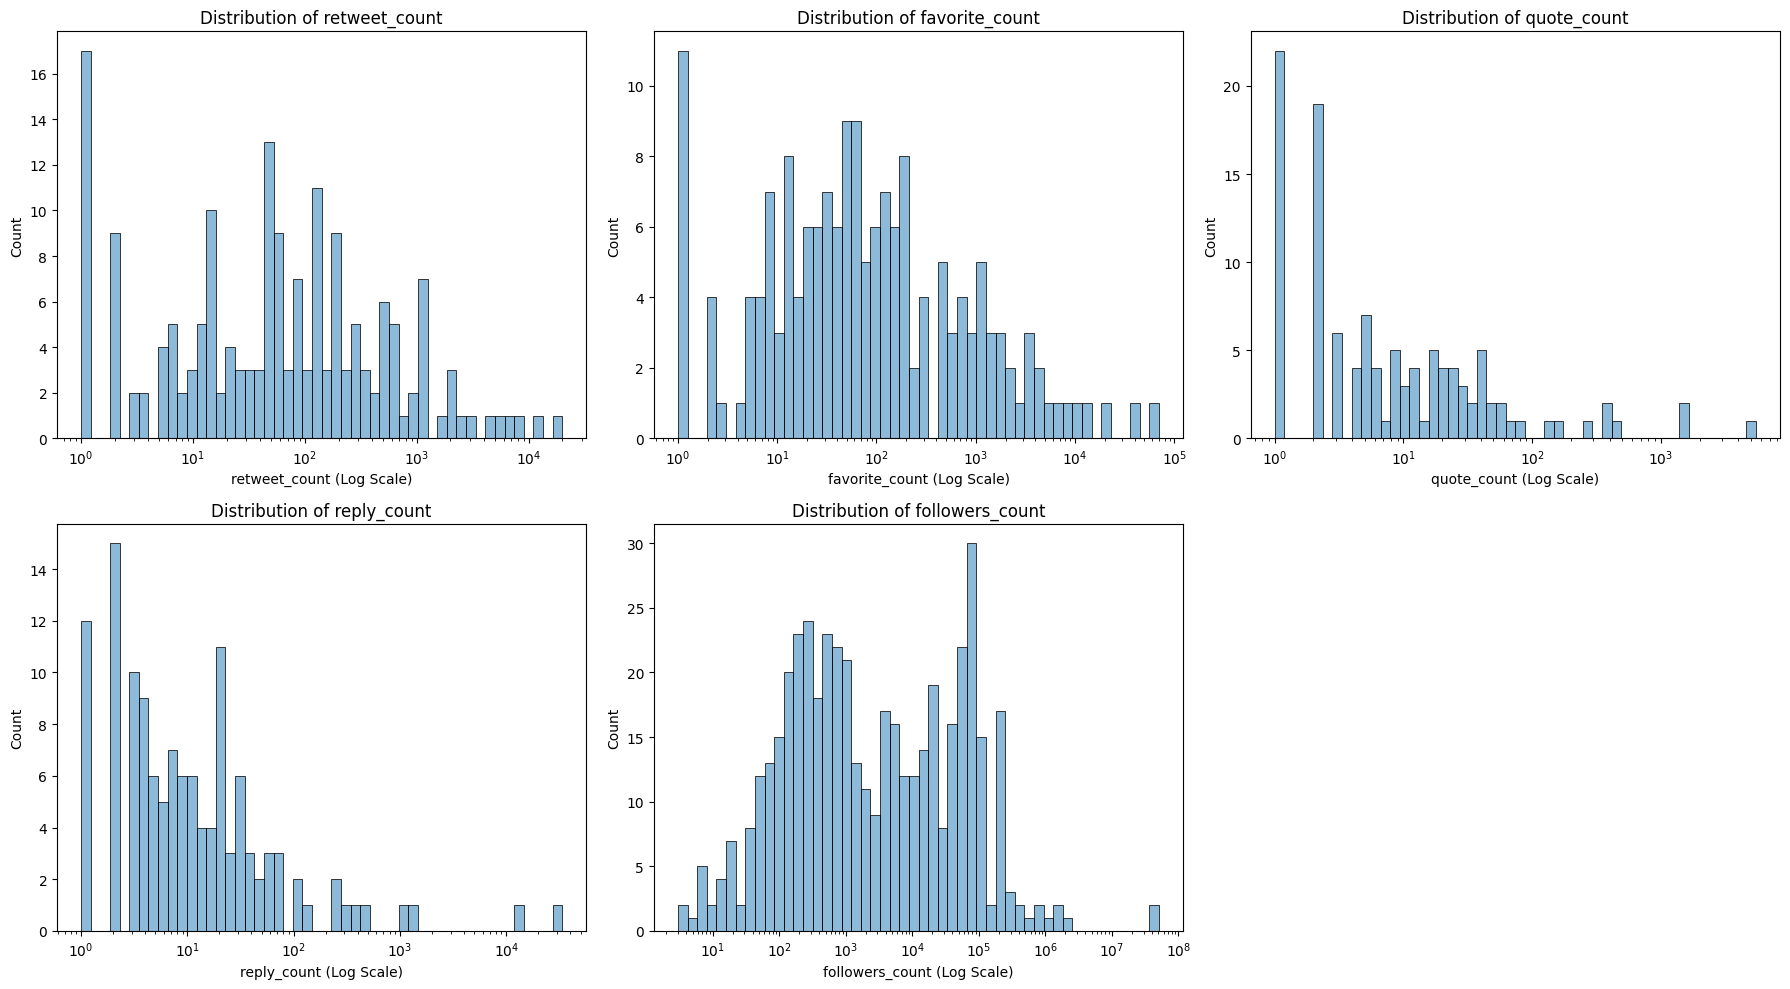

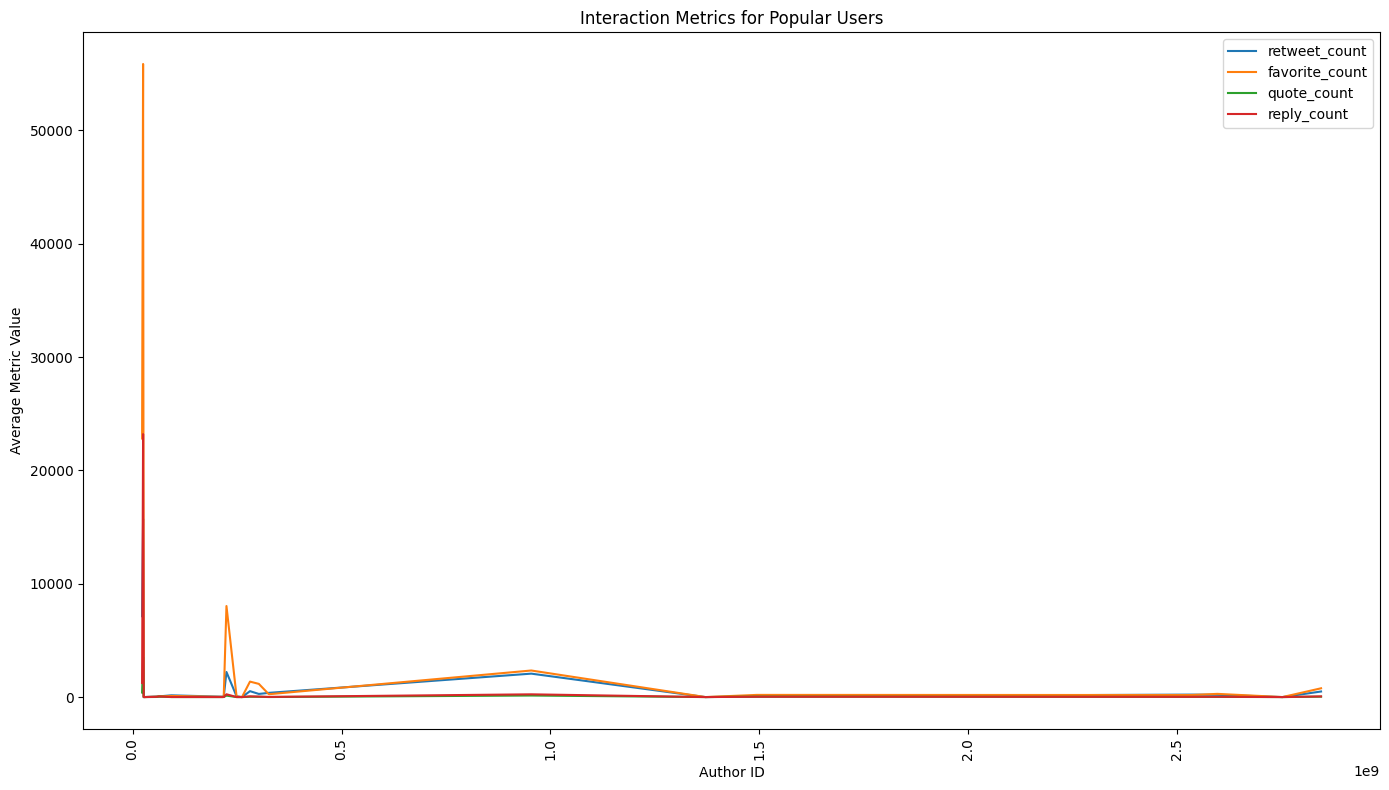

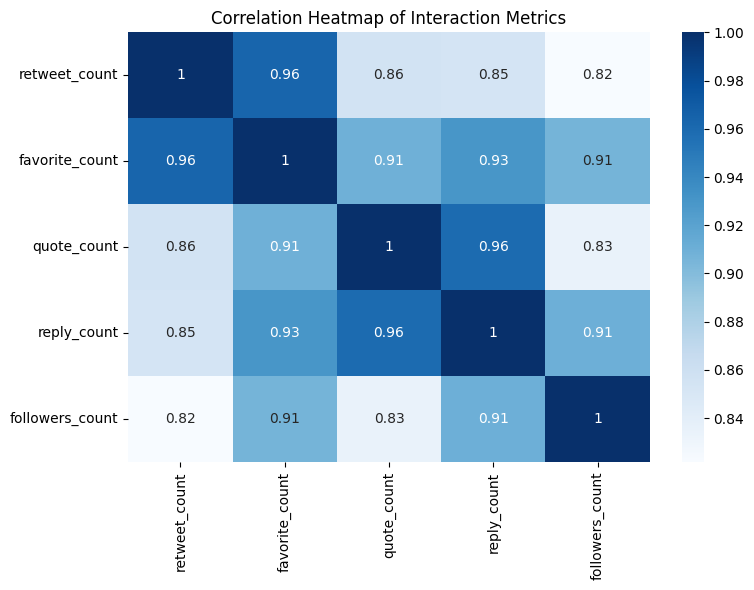

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Read the relevant data files from the 'cleaned-data' folder
tweets_df = pd.read_csv('./cleaned-data/cleaned_tweet_metadata.csv')
users_df = pd.read_csv('./cleaned-data/cleaned_twitter_user.csv')

# Merge tweet and user data
tweets_users_df = tweets_df.merge(
    users_df,
    left_on='author_id',
    right_on='id',
    suffixes=('_tweet', '_user')
)

# Analyze Interaction Data for Tweets
interaction_metrics = [
    'retweet_count',
    'favorite_count',
    'quote_count',
    'reply_count',
    'followers_count'
]

# Ensure the interaction metrics are numeric
for metric in interaction_metrics:
    tweets_users_df[metric] = pd.to_numeric(tweets_users_df[metric], errors='coerce')

# Remove rows with NaN in interaction metrics
tweets_users_df.dropna(subset=interaction_metrics, inplace=True)

# Plot the distribution of interaction metrics with increased granularity
plt.figure(figsize=(18, 10))
for i, metric in enumerate(interaction_metrics):
    plt.subplot(2, 3, i + 1)
    # Increase bins and use log scale if necessary
    max_value = tweets_users_df[metric].max()
    if max_value > 1000:
        sns.histplot(tweets_users_df[metric], bins=50, kde=True, log_scale=(True, False))
        plt.xlabel(f'{metric} (Log Scale)')
    else:
        sns.histplot(tweets_users_df[metric], bins=50, kde=True)
        plt.xlabel(metric)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.savefig('interaction_metrics_distribution.png')
plt.show()

# Analyze Popular Users with Increased Granularity
# Define threshold for popular users (e.g., top 10% by followers_count)
popularity_threshold = tweets_users_df['followers_count'].quantile(0.90)
popular_users_df = tweets_users_df[tweets_users_df['followers_count'] >= popularity_threshold]

# Metrics for popular users
popular_user_metrics = popular_users_df.groupby('author_id')[interaction_metrics].mean()
popular_user_metrics.reset_index(inplace=True)

# Sort users by followers_count
popular_user_metrics.sort_values(by='followers_count', ascending=False, inplace=True)

# Plot average interaction metrics for popular users
plt.figure(figsize=(14, 8))
# Plot each metric separately
for metric in interaction_metrics[:-1]:  # Exclude 'followers_count' from metrics to plot
    sns.lineplot(
        data=popular_user_metrics,
        x='author_id',
        y=metric,
        label=metric
    )

plt.title('Interaction Metrics for Popular Users')
plt.xlabel('Author ID')
plt.ylabel('Average Metric Value')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('popular_users_interaction_metrics.png')
plt.show()

# Additional Visualization: Correlation Heatmap
correlation_matrix = tweets_users_df[interaction_metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Interaction Metrics')
plt.tight_layout()
plt.savefig('interaction_metrics_correlation_heatmap.png')
plt.show()

# Save the summary statistics to CSV
interaction_summary = tweets_users_df[interaction_metrics].describe()
interaction_summary.to_csv('interaction_summary.csv')
popular_user_metrics.to_csv('popular_user_metrics.csv', index=False)
